# Homework 5

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Question 1  
A six months at–the–money call on an underlying asset with spot price 30 paying dividends continuously at a 1% rate is worth 2.5. Assume that the risk free interest rate is constant at 3%. Use Newton’s method with initial guess 0.5 to compute the corresponding implied volatility with six decimal digits accuracy.



In [3]:
import numpy as np
import scipy.stats as spstats
#######################

#######################
# Return f(sigma_k) value
def fn(S_0, K, r, q, T, sigma, V_m, cpFlag):
    d1 = (np.log(S_0/K) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N_d1 = spstats.norm.cdf(d1,0,1)
    N_d2 = spstats.norm.cdf(d2,0,1)

    # If call-put flag = "c" then return C - V_m
    if cpFlag == "c":
        return S_0*N_d1 - K*np.exp(-r*T)*N_d2 - V_m
    else: # else return P - V_m
        return K*np.exp(-r*T) - S_0 + S_0*N_d1 - K*np.exp(-r*T)*N_d2 - V_m

#######################
# Return vega(sigma_k) value
def vegaFunc(S_0, K, r, q, T, sigma):
    d1 = (np.log(S_0/K) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    N_d1 = spstats.norm.cdf(d1,0,1)
    
    return S_0*np.exp(-q*T)*N_d1*np.sqrt(T)

# Newton estimation
def Newton(S_0, K, r, q, T, sigma, V_m, flag):
    fnVal = fn(S_0, K, r, q, T, sigma, V_m, flag)
    vegaVal = vegaFunc(S_0, K, r, q, T, sigma)
    
    return sigma - (fnVal/vegaVal)

# Estimating with tolerance
def tolCheck(S_0, K, r, q, T, sigma, V_m, flag, tol):
    k=0
    prev = Newton(S_0, K, r, q, T, sigma, V_m, flag)
    
    while True:
        k+=1
        current = Newton(S_0, K, r, q, T, prev, V_m, flag)
        if abs(current-prev) > tol:
            print(f'sigma_{k} = {current}')
            prev = current
        else:
            print(f'Converged at sigma_{k} = {current} and tolerance = {abs(current-prev)} <= {tol}')
            break
    
    return current
    
    
    
#######################
# Given values
S_0 = 30
K = 30
r = .03
q = .01
T = 6/12
V_m = 2.5
sigma_0 = .5

# Set tolerance
tol = 10**(-6)

flag = "c"
tolCheck(S_0, K, r, q, T, sigma_0, V_m, flag, tol)

sigma_1 = 0.2929958326338501
sigma_2 = 0.2772911639225877
sigma_3 = 0.2726465253606349
sigma_4 = 0.2712819376896849
sigma_5 = 0.27088174885134203
sigma_6 = 0.27076444732908866
sigma_7 = 0.27073006962093976
sigma_8 = 0.27071999494540777
sigma_9 = 0.2707170425153714
Converged at sigma_10 = 0.2707161772954289 and tolerance = 8.65219942469686e-07 <= 1e-06


0.2707161772954289

## Question 2  
The file S&P500ETFOption0917.xlsx contains the S&P 500 option prices with 9/29/2017 maturity as of March 16, 2017. The spot price of the index corresponding to these option prices was 2381. Assume that the market estimates for the annualized continuous dividend yield of the S&P500 index and for the risk-free rate were q = 1.6042% and r = 1.2516%, respectively.  

Compute the implied volatilities corresponding to the mid-price quotes (average of Bid and Ask quotes of each option.) How do the implied volatilities of calls and puts with the same strike compare to each other?

In [4]:
import pandas as pd

# Load the CSV
optionChain = pd.read_csv('S&P500_ETF_Option_0917csv.csv')

# Add mid-price quote C_m, P_m
optionChain['C_m'] = optionChain[['Bid_C', 'Ask_C']].mean(axis=1)
optionChain['P_m'] = optionChain[['Bid_P', 'Ask_P']].mean(axis=1)


In [23]:
# Given parameters
S_0 = 2381
r = 1.2516/100
q = 1.6042/100
T = 142/252
sigma_0 = .5

# Add implied vol for C and P
optionChain['sigma_C'] = optionChain.apply(lambda row: Newton(S_0, row['K'], r, q, T, sigma_0, row['C_m'], "c"), axis=1)
optionChain['sigma_P'] = optionChain.apply(lambda row: Newton(S_0, row['K'], r, q, T, sigma_0, row['P_m'], "p"), axis=1)

pd.set_option("display.precision", 12)
optionChain


,K,Bid_C,Ask_C,Volm_C,Bid_P,Ask_P,Volm_P,C_m,P_m,sigma_C,sigma_P
0,2150,259.299987800,260.700012200,0,34.79999924,35.70000076,10,260.0000000000,35.250000000,0.321891421844,0.339752167052
1,2175,238.100006100,239.600006100,0,38.50000000,39.40000153,10,238.8500061000,38.950000765,0.312206625291,0.330389380514
2,2200,217.399993900,218.899993900,0,42.50000000,43.50000000,10,218.1499939000,43.000000000,0.302313227892,0.320743004830
3,2225,197.199996900,198.699996900,0,47.09999847,48.09999847,0,197.9499969000,47.599998470,0.292249548170,0.310979105751
4,2250,177.399993900,178.899993900,0,52.09999847,53.20000076,1,178.1499939000,52.649999615,0.281922979344,0.301007607281
5,2275,158.300003100,159.699996900,0,57.79999924,58.90000153,0,159.0000000000,58.350000385,0.271554051444,0.291006121141
6,2300,139.800003100,141.300003100,0,64.09999847,65.30000305,1,140.5500031000,64.700000760,0.261194503262,0.280980330698
7,2325,122.099998500,123.599998500,0,71.19999695,72.50000000,2,122.8499985000,71.849998475,0.250900599957,0.271078830602
8,2350,105.300003100,106.800003100,5,79.09999847,80.50000000,0,106.0500031000,79.799999235,0.240829837576,0.261317555810
9,2375,89.500000000,90.900001530,5,88.09999847,89.50000000,4,90.2000007650,88.799999235,0.231054110963,0.251959637150


We can see implied volatility for Put options are higher than that of Call options for each strike and the increase accelerates as the strikes go from deep ITM to to OTM. Examine the delta:

In [6]:
optionChain['sigma_C'] - optionChain['sigma_P']

0    -0.017860745209
1    -0.018182755223
2    -0.018429776938
3    -0.018729557581
4    -0.019084627937
5    -0.019452069697
6    -0.019785827436
7    -0.020178230645
8    -0.020487718235
9    -0.020905526186
10   -0.021237388837
11   -0.021681944335
12   -0.022141415726
13   -0.022510042656
14   -0.022998501716
15   -0.023516267621
16   -0.024471333534
17   -0.026717370547
18   -0.027917441319
19   -0.030413899565
dtype: float64

Plotting the delta:

([<matplotlib.axis.XTick at 0x2c57357c790>,
 [Text(0, 0, '2150'),
  Text(0, 0, '2175'),
  Text(0, 0, '2200'),
  Text(0, 0, '2225'),
  Text(0, 0, '2250'),
  Text(0, 0, '2275'),
  Text(0, 0, '2300'),
  Text(0, 0, '2325'),
  Text(0, 0, '2350'),
  Text(0, 0, '2375'),
  Text(0, 0, '2400'),
  Text(0, 0, '2425'),
  Text(0, 0, '2450'),
  Text(0, 0, '2475'),
  Text(0, 0, '2500'),
  Text(0, 0, '2550'),
  Text(0, 0, '2600'),
  Text(0, 0, '2650'),
  Text(0, 0, '2700'),
  Text(0, 0, '2800')])

Text(0.5, 0, 'Strike')

Text(0, 0.5, 'Call-Put Option Delta Implied Vol')

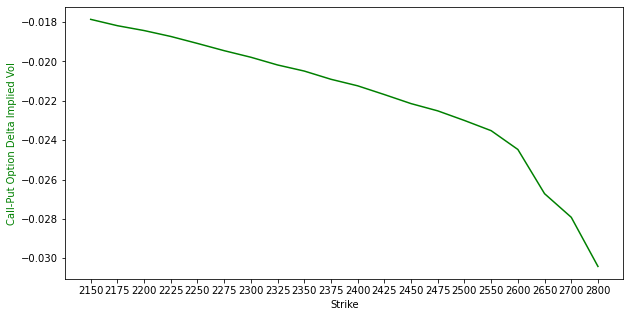

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

#ax2 = ax1.twinx()  # Create twin axes
plt.xticks(optionChain.index,optionChain['K'].values)
ax1.plot(optionChain['sigma_C']-optionChain['sigma_P'], 'g-')
#ax2.plot(optionChain['sigma_P'], 'r-')

ax1.set_xlabel('Strike')
ax1.set_ylabel('Call-Put Option Delta Implied Vol', color='g')
#ax2.set_ylabel('Put Option Implied Vol', color='r')

plt.show()

## Question 3  
A five months at–the–money call on an underlying asset with spot price 40 paying dividends continuously at a 1% rate is worth 2.75. Assume that the risk free interest rate is constant at 2.5%.  

### (i) Compute the implied volatility with six decimal digits accuracy, using the bisection method on the interval [0.0001, 1], the secant method with initial guess 0.5, and Newton’s method with initial guess 0.5.  

### (ii) Let $σ_{imp}$ be the implied volatility previously computed using Newton’s method. Use the following formula:  

\begin{equation}
    \begin{split}
        \sigma_{imp,approx} \approx & \frac{\sqrt{2\pi}}{S\sqrt{T}} \frac{C - \frac{(r-q)T}{2}S}{1-\frac{(r+q)T}{2}}
    \end{split}
\end{equation}
  
to compute an approximate value $\sigma_{imp,approx}$ for the implied volatility, and compute the relative error:  

\begin{equation}
    \begin{split}
        \frac{|\sigma_{imp,approx} - \sigma_{imp}|}{\sigma_{imp}}
    \end{split}
\end{equation}

#### (i1) Compute Implied Vol using Bi-section Method

In [8]:
# Return Call value at time 0 using Black Scholes
def C0_BS(S_0, K, r, q, T, sigma):
    d1 = (np.log(S_0/K) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N_d1 = spstats.norm.cdf(d1,0,1)
    N_d2 = spstats.norm.cdf(d2,0,1)
    return np.exp(-r*T) * ((S_0 * np.exp((r-q)*T) * N_d1) - (K * N_d2))

# Bi-section method
def bisec(S_0, K, r, q, T, V_m, tol, sigma_lower, sigma_upper):
    while True:
        sigma = .5*(sigma_lower + sigma_upper)
        callBS = C0_BS(S_0, K, r, q, T, sigma)  # Calculate premium using BS
        epsilon = callBS - V_m # Calculate error between calculated premium and market premium
        print(f'Bound [{sigma_lower}, {sigma_upper}], with epsilon = {epsilon}')
        if abs(epsilon) > tol:
            if epsilon < 0:
                sigma_lower = sigma
            else:
                sigma_upper = sigma
        else:
            break
    print(f'Converged at sigma = {sigma} with epsilon = |{epsilon}|')
    return sigma
            
#######################
# Given values
S_0 = 40
K = 40
r = 2.5/100
q = .01
T = 5/12
V_m = 2.75

# Given method-specific parameters
sigma_lower = .0001
sigma_upper = 1

# Set tolerance
tol = 10**(-6)

bisec(S_0, K, r, q, T, V_m, tol, sigma_lower, sigma_upper)

Bound [0.0001, 1], with epsilon = 2.466367568389761
Bound [0.0001, 0.50005], with epsilon = -0.06953953226269283
Bound [0.250075, 0.50005], with epsilon = 1.2013509613803586
Bound [0.250075, 0.37506249999999997], with epsilon = 0.5664886801689542
Bound [0.250075, 0.31256874999999995], with epsilon = 0.24859898799169322
Bound [0.250075, 0.28132187499999994], with epsilon = 0.08955788703364354
Bound [0.250075, 0.2656984375], with epsilon = 0.01001582400237977
Bound [0.250075, 0.25788671875], with epsilon = -0.02976024355072715
Bound [0.25398085937500003, 0.25788671875], with epsilon = -0.009871800650462337
Bound [0.25593378906250003, 0.25788671875], with epsilon = 7.211475819302038e-05
Bound [0.25593378906250003, 0.25691025390625], with epsilon = -0.0048998172753673686
Bound [0.256422021484375, 0.25691025390625], with epsilon = -0.0024138448283959058
Bound [0.2566661376953125, 0.25691025390625], with epsilon = -0.0011708634259943729
Bound [0.25678819580078127, 0.25691025390625], with eps

0.2569031020641327

#### (i2) Compute Implied Vol using Secant Method

Not possible, need 2 initial guess $x_k$ and $x_{k-1}$

#### (i3) Compute Implied Vol using Newton Method

In [9]:
#######################
# Given values
S_0 = 40
K = 40
r = 2.5/100
q = .01
T = 5/12
V_m = 2.75

# Given method-specific parameters
sigma_0 = .5

# Set tolerance
tol = 10**(-6)

sigma = tolCheck(S_0, K, r, q, T, sigma_0, V_m, flag, tol)

sigma_1 = 0.27008443524508075
sigma_2 = 0.2541075454477817
sigma_3 = 0.24966034665932593
sigma_4 = 0.24843158232850474
sigma_5 = 0.2480927270878483
sigma_6 = 0.2479993299419434
sigma_7 = 0.2479735909813801
sigma_8 = 0.24796649795875833
sigma_9 = 0.24796454331783802
Converged at sigma_10 = 0.24796400467444987 and tolerance = 5.3864338814269e-07 <= 1e-06


### (ii) Let $σ_{imp}$ be the implied volatility previously computed using Newton’s method. Use the following formula:  

\begin{equation}
    \begin{split}
        \sigma_{imp,approx} \approx & \frac{\sqrt{2\pi}}{S\sqrt{T}} \frac{C - \frac{(r-q)T}{2}S}{1-\frac{(r+q)T}{2}}
    \end{split}
\end{equation}
  
to compute an approximate value $\sigma_{imp,approx}$ for the implied volatility, and compute the relative error:  

\begin{equation}
    \begin{split}
        \frac{|\sigma_{imp,approx} - \sigma_{imp}|}{\sigma_{imp}}
    \end{split}
\end{equation}

In [10]:
# Given values
S_0 = 40
K = 40
r = 2.5/100
q = .01
T = 5/12
V_m = 2.75

# Given method-specific parameters
sigma_0 = .5

# Set tolerance
tol = 10**(-6)

# Calculate implied vol using Newton's method
sigma = tolCheck(S_0, K, r, q, T, sigma_0, V_m, flag, tol)

# Calculate Call value using BS
callBS = C0_BS(S_0, K, r, q, T, sigma)

# Calculate sigma_{implied,approx}
sigmaImpApprox = (np.sqrt(2*np.pi) / (S_0*np.sqrt(T))) * ((callBS - .5*(r-q)*T*S_0)/(1-.5*(r+q)*T))
print(f'sigmaImpApprox = {sigmaImpApprox}')

# Calculate error term
epsilon = (abs(sigmaImpApprox - sigma)) / sigma
print(f'Relative error = {epsilon}')


sigma_1 = 0.27008443524508075
sigma_2 = 0.2541075454477817
sigma_3 = 0.24966034665932593
sigma_4 = 0.24843158232850474
sigma_5 = 0.2480927270878483
sigma_6 = 0.2479993299419434
sigma_7 = 0.2479735909813801
sigma_8 = 0.24796649795875833
sigma_9 = 0.24796454331783802
Converged at sigma_10 = 0.24796400467444987 and tolerance = 5.3864338814269e-07 <= 1e-06
sigmaImpApprox = 0.2478070166537635
Relative error = 0.0006331081033010195


## Question 4  

Use Newton’s method to find the yield of a three year semiannual coupon bond with 4% coupon rate and price 101. What are the modified duration and the convexity of the bond?

In [11]:
def bondYieldFunc(y, T, t, cRate, B_default, B_m):
    t_i = T
    cumsumNumerator = 0
    cumsumDenominator = 0
    
    # Start from the final coupon payment (coupon + principal), works backwards
    while t_i>0:
        if t_i==T:  # if it's the final coupon payment, include principal
            c_i = cRate*B_default*t + B_default
        else:
            c_i = cRate*B_default*t
        
        cumsumNumerator += c_i*np.exp(-y*t_i)
        cumsumDenominator += c_i*t_i*np.exp(-y*t_i)
        
        t_i -= t
    
    return (cumsumNumerator-B_m)/cumsumDenominator      

#######################
def bondYieldNewton(y, T, t, cRate, B_default, B_m, tol):
    k = 0
    prev = y
    
    while True:
        k += 1
        current = prev + bondYieldFunc(prev, T, t, cRate, B_default, B_m)
        
        if abs(current - prev) > tol:
            print(f'y_{k} = {current}')
            prev = current
        else:
            print(f'Converged at y_{k} = {current} and tolerance = {abs(current-prev)} <= {tol}')
            break
    
    return current

#######################
def bondDurationMod(cRate, y, t, T, B_default, B_m):
    t_i = T
    D = 0
    
    while t_i > 0:
        if t_i==T:  # if it's the final coupon payment, include principal
            c_i = cRate*B_default*t + B_default
        else:
            c_i = cRate*B_default*t
        
        D += t_i*c_i*np.exp(-y*t_i)/B_m  
        t_i -= t

    return D

#######################
def bondConvexity(cRate, y, t, T, B_m):
    t_i = T
    cumsum = 0
    
    while t_i > 0:
        if t_i==T:  # if it's the final coupon payment, include principal
            c_i = cRate*B_default*t + B_default
        else:
            c_i = cRate*B_default*t
        
        cumsum += (t_i**2)*c_i*np.exp(-y*t_i)
        
        t_i -= t
    
    return cumsum/B_m

#######################
# Given values
T = 3  # 3 year to maturity bond
t = 6/12  # semi annual coupon
cRate = 4/100  # coupon rate
B_m = 101  # bond's market value
B_default = 100  # bond's notional
y_0 = 3/100  # initial guess

# Given method-specific parameters


# Set tolerance
tol = 10**(-6)

# Calculate yield using Newton's method
y = bondYieldNewton(y_0, T, t, cRate, B_default, B_m, tol)
print(f'Bond Yield using Newton method y = {y}')

# Calculate Bond Duration
D = bondDurationMod(cRate, y, t, T, B_default, B_m)
print(f'Bond Modified Duration = {D}')

# Calculate Bond Convexity
C = bondConvexity(cRate, y, t, T, B_m)
print(f'Bond Convexity = {C}')

y_1 = 0.03606782270857526
y_2 = 0.036122648341282315
Converged at y_3 = 0.03612265276419259 and tolerance = 4.42291027413777e-09 <= 1e-06
Bond Yield using Newton method y = 0.03612265276419259
Bond Modified Duration = 2.857578002971667
Bond Convexity = 8.40856234339025


## Question 5  
Consider a call option with strike K and maturity T , on a lognormally distributed underlying asset with spot price S, volatility σ, and paying dividends continuously at rate q. Assume that the risk–free interest rates are constant equal to r.  

### i) Finding the value of the strike price such that the ∆ of the call is 0.5 requires solving  
  
\begin{equation}
    \begin{split}
        \Delta(C) =& e^{-qT} * N(d_1) = \frac{1}{2}
    \end{split}
\end{equation}

for $K$, where $N(x)$ be the cumulative density of the standard normal variable and:  
  
 \begin{equation}
    \begin{split}
        d_1 =& \frac{\ln{\big( \frac{S_0}{K} \big)} + \big( r - q + \frac{\sigma^2}{2}\big)T }{\sigma \sqrt{T}}
    \end{split}
\end{equation}
  
Write down the Newton’s method recursion for solving $\Delta(C) = \frac{1}{2}$ for K.
  
### (ii) Consider a lognormally distributed asset with spot price 30, volatility 30%, and paying 1% dividends continuously. Assume that the risk–free interest rates are constant equal to 2.5%. Find the strike at which the $\Delta$ of a three months call on this asset is 0.5. Start with an ATM strike and use Newton’s method with $tol = 10^{−6}$. Report all intermediate values from Newton’s method.

### (i)  

The equation we need to find root of is:
  
\begin{equation}
    \begin{split}
        \Delta(C) =& e^{-qT} * N(d_1) = \frac{1}{2}
    \end{split}
\end{equation}
  
Thus, for our Newton's approximation, we have:
  
\begin{equation}
    \begin{split}
        f(K) =& e^{-qT} * N(d_1) - \frac{1}{2}  \\
             =& \Big[ e^{-qT} * \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{d_1} e^{-\frac{z^2}{2}}dz \Big] - \frac{1}{2}  \\
        \text{where}   \\
        d_1 =& \frac{\ln{\big( \frac{S_0}{K} \big)} + \big( r - q + \frac{\sigma^2}{2}\big)T }{\sigma \sqrt{T}}  \\
    \end{split}
\end{equation}

In addition, we examine $f'(K)$:
  
\begin{equation}
    \begin{split}
        f'(K) =& e^{-qT} N'(d1) \frac{\partial{d_1}}{\partial{K}}  \\
              =& e^{-qT} \frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}} \frac{\partial{d_1}}{\partial{K}}  \\
              =& e^{-qT} \frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}} \frac{1}{\sigma \sqrt{T}} \Big[ \frac{\partial{\big[ \ln{S_0} - \ln{K} + \big( r - q + \frac{\sigma^2}{2} \big)T \big]}}{\partial{K}} \Big]  \\
              =& \frac{e^{-\big( qT + \frac{d_1^2}{2} \big)}}{\sqrt{2\pi}} \frac{-1}{K \sigma \sqrt{T}}  \\
              =& \frac{-e^{-\big( qT + \frac{d_1^2}{2} \big)}}{K \sigma \sqrt{2\pi T}}
    \end{split}
\end{equation}
  
Therefore, we have our Newton's recursion method as follow:
  
\begin{equation}
    \begin{split}
        K_{n+1} =& K_n - \frac{f(K_n)}{f'(K_n)}  \\
                =& K_n - \frac{e^{-qT} N(d1) - \frac{1}{2}}{\frac{-e^{-\big( qT + \frac{d_1^2}{2} \big)}}{K_n \sigma \sqrt{2\pi T}}}  \\
        K_{n+1} =& K_n - \Big[ \frac{1}{2} - e^{-qT}N(d_1) \Big] * e^{\big( qT + \frac{d_1^2}{2} \big)} * K_n \sigma \sqrt{2\pi T}
    \end{split}
\end{equation}

### (ii)

In [12]:
#######################
def KDeltaNewtonEstFunc(S_0, K, r, q, T, sigma):
    d1 = (np.log(S_0/K) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    N_d1 = spstats.norm.cdf(d1,0,1)
    
    return (.5 - np.exp(-q*T) * N_d1) * np.exp(q*T + .5*d1**2) * K * sigma * np.sqrt(2*np.pi*(T))  

def KDeltaNewton(S_0, K_0, r, q, T, sigma):
    n = 0
    prev = K_0
    
    while True:
        n += 1
        current = prev - KDeltaNewtonEstFunc(S_0, prev, r, q, T, sigma)
        
        if abs(current - prev) > tol:
            print(f'K_{n} = {current}')
            prev = current
        else:
            print(f'Converged at K_{n} = {current} and tolerance = {abs(current-prev)} <= {tol}')
            break
    
    return current
    
#######################
# Given values
S_0 = 30
sigma = .3
q = 1/100
r = 2.5/100
delta_0 = .5
K_0 = 30
T = 3/12

# Set tolerance
tol = 10**(-6)

# Calculate K using Newton method
K_approx =  KDeltaNewton(S_0, K_0, r, q, T, sigma)

K_1 = 30.437314816939534
K_2 = 30.439064456185854
Converged at K_3 = 30.439064505336926 and tolerance = 4.9151072545328134e-08 <= 1e-06


## Question 6  
The Theta of a plain vanilla European put option is given in equation: (3.79) of the book. Consider a six months put on a non-dividend paying asset with lognormal distribution with volatility 30%. Assume that the risk-free interest rates are constant at 3%. Use Newton’s method to find the largest value of $\frac{S_0}{K}$ (i.e. the moneyness of the option) such that $\theta(P) \geqslant 0$.

The theta of a non-dividend paying put option:  

\begin{equation}
    \begin{split}
        \theta(P) =& -\frac{S_0 \sigma e^{ -\frac{d_1^2}{2}}} {2\sqrt{2 \pi T}} + rKe^{-rT}N(-d_2)  \\
    \end{split}
\end{equation}

Examine the positive theta constraint:  

\begin{equation}
    \begin{split}
        \theta(P) \geqslant 0  \\
        -\frac{S_0 \sigma e^{ -\frac{d_1^2}{2}}} {2\sqrt{2 \pi T}} + rKe^{-rT}N(-d_2) \geqslant & 0  \\
        \frac{S_0 \sigma e^{ -\frac{d_1^2}{2}}} {2\sqrt{2 \pi T}} \leqslant &  rKe^{-rT}N(-d_2)  \\
        \frac{S_0}{K} \leqslant & \frac{2r \sqrt{2 \pi T}}{\sigma} e^{-rT + .5d_1^2} N(-d_2)  \\
        \frac{2r \sqrt{2 \pi T}}{\sigma} e^{-rT + .5d_1^2} N(-d_2) - \frac{S_0}{K} \geqslant 0  \\
    \end{split}
\end{equation}
  
Let $X = \frac{S_0}{K}$, we are maximizing $f(X) = \frac{2r \sqrt{2 \pi T}}{\sigma} e^{-rT + .5d_1^2} N(-d_2) - \frac{S_0}{K}$.  

Examine $f'(X)$:  

\begin{equation}
    \begin{split}
        f'(X) =& \frac{2re^{-rT} \sqrt{2 \pi T}}{\sigma} \Big[ e^{.5d_1^2} d_1 \frac{1}{X \sigma \sqrt{T}} N(-d_2) - e^{.5d_1^2} \frac{e^{-.5d_2^2}}{\sqrt{2 \pi}} \frac{1}{X \sigma \sqrt{T}} \Big]  - 1  \\
        f'(X) =& \frac{2re^{-rT} \sqrt{2 \pi T}}{X \sigma^2 \sqrt{T}} e^{.5d_1^2} \Big[ d_1N(-d_2) - \frac{e^{-.5d_2^2}}{\sqrt{2 \pi}} \Big]  \\
    \end{split}
\end{equation}
  
Thus, we set up our Newton's method:

\begin{equation}
    \begin{split}
        \Big(\frac{S_0}{K}\Big)_{n+1} =& \Big(\frac{S_0}{K}\Big)_n - \frac{f\Big( \frac{S_0}{K} \Big)_n}{f'\Big( \frac{S_0}{K} \Big)_n}  \\
        \text{or}  \\
        X_{n+1} =& X_n - \frac{f(X_n)}{f'(X_n)}  \\
    \end{split}
\end{equation}
  
Naturally, our initial guess will be that the option will be ATM, i.e. $\frac{S_0}{K} = 1$ or $X=1$. We will also assume $10^{-12}$ degree of tolerance, i.e. up to 12 digit accuracy.

In [13]:
#######################
def thetaDivK(X, r, q, T, sigma):
    d1 = (np.log(X) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N_minusd2 = spstats.norm.cdf(-d2,0,1)
    
    return (-X*sigma*np.exp(-.5*d1**2)/(2*np.sqrt(2*np.pi*T))) + r*np.exp(-r*T)*N_minusd2


#######################
def func(X, r, q, T, sigma):
    d1 = (np.log(X) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N_minusd2 = spstats.norm.cdf(-d2,0,1)
    
    return 2*r*np.exp(-r*T)*np.sqrt(2*np.pi*T)*np.exp(.5*d1**2)*N_minusd2/sigma - X

#######################
def funcPrime(X, r, q, T, sigma):
    d1 = (np.log(X) + (r - q + 0.5*(sigma**2)) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N_minusd2 = spstats.norm.cdf(-d2,0,1)
    
    return 2*r*np.exp(-r*T)*np.sqrt(2*np.pi*T)*np.exp(.5*d1**2)*(d1*N_minusd2 - (np.exp(-.5*d2**2)/np.sqrt(2*np.pi)))/(X*sigma**2*np.sqrt(T)) - 1

def moneynessNewton(X, r, q, T, sigma,tol):
    prev = X
    n = 0
    while True:
        n+=1
        current = prev - func(prev, r, q, T, sigma) / funcPrime(prev, r, q, T, sigma)
        print(f'{thetaDivK(prev, r, q, T, sigma)}')
        if abs(current-prev) > tol:
            print(f'(S_0/K)_{n} = {current}')
            prev = current
        else:
            print(f'Converged at (S_0/K)_{n} = {current}')
            break
    
#######################
# Given values
X_0 = 1
sigma = .3
q = 0
r = 3/100
T = 6/12
tol = 10**(-12)
                  
# Calculate max moneyness using Newton
moneynessNewton(X_0, r, q, T, sigma, tol)

-0.06812296053037992
(S_0/K)_1 = 0.4601961145995833
0.029459315533518906
(S_0/K)_2 = 0.4881391107766202
0.029300179772275073
(S_0/K)_3 = 0.5201629835372593
0.028877800750035505
(S_0/K)_4 = 0.557221390210598
0.027784882665603805
(S_0/K)_5 = 0.60007228798315
0.02511931597708877
(S_0/K)_6 = 0.6478424397994033
0.019452485665925383
(S_0/K)_7 = 0.6942562536067973
0.010529318382366582
(S_0/K)_8 = 0.7251952634720095
0.0026864872421540585
(S_0/K)_9 = 0.7341774686717223
0.00015726043498561978
(S_0/K)_10 = 0.734722431978308
5.217499230297795e-07
(S_0/K)_11 = 0.7347242439127344
5.731772695360959e-12
(S_0/K)_12 = 0.7347242439326398
2.0816681711721685e-17
Converged at (S_0/K)_13 = 0.7347242439326399


## Question 7  

Use bootstrapping to obtain a zero rate curve given the prices of the following semiannual coupon bonds:  

| Maturity | Coupon Rate | Price |
|----------|-------------|-------|
| 6 months | 0           | 97.5  |
| 1 year   | 5           | 100   |
| 3 year   | 5           | 102   |
| 5 year   | 6           | 104   |

Assume that the overnight rate is 5%.  

Report the zero rates corresponding to each cash flow date; include the overnight rate. For the Newton’s methods corresponding to the 3–year bond, report the iteration counts and every approximate value. The stopping criterion for each Newton’s method is that two consecutive approximations are within 10−6 of each other, and the initial guess is $x_0 = 0.05$.

### For 6-month maturity  

\begin{equation}
    \begin{split}
        97.5 =& 100e^{-.5*r(0,.5)}  \\
        \frac{97.5}{100} =& e^{-.5*r(0,.5)}   \\
        -.5*r(0,.5) =& \ln{\frac{97.5}{100}}  \\
        r(0,.5) =& -2 \ln{\frac{97.5}{100}}  \\
    \end{split}
\end{equation}

In [14]:
print(f'r(0,.5) = {-2*np.log(97.5/100)}.')

r(0,.5) = 0.050635615968579795.


### For 1-year maturity  

\begin{equation}
    \begin{split}
        100 =& 2.5*e^{-.5*r(0,.5)} + 102.5e^{-1*r(0,1)}  \\
        100 =& 2.5*e^{-.5*.050635615968579795} + 102.5e^{-1*r(0,1)}   \\
        r(0,1) =& -1 \ln{\frac{100 - 2.5*e^{-.5*.050635615968579795}}{102.5}}  \\
    \end{split}
\end{equation}

In [15]:
print(f'r(0,1) = {-1*np.log((100-2.5*np.exp(-.5*.050635615968579795))/102.5)}.')

r(0,1) = 0.04936960030281209.


### For 3-year maturity  

\begin{equation}
    \begin{split}
        102 =& 2.5*e^{-.5*r(0,.5)} + 2.5*e^{-1*r(0,1)} +  \\
             & 2.5*e^{-1.5*r(0,1.5)} + 2.5*e^{-2*r(0,2)} +  \\
             & 2.5*e^{-2.5*r(0,2.5)} + 102.5e^{-3*r(0,3)}  \\
    \end{split}
\end{equation}
  
#### Find 1.5-year maturity rate
  
\begin{equation}
    \begin{split}
        r(0,1.5) =& \frac{1.5-1}{3-1} r(0,3) + \frac{3-1.5}{3-1} r(0,1)  \\
                 =& .25 r(0,3) + .75 * .04936960030281209  \\
                 =& .25 r(0,3) + .037027200227109064  \\
    \end{split}
\end{equation}
  
#### Find 2-year maturity rate
  
\begin{equation}
    \begin{split}
        r(0,2) =& \frac{2-1}{3-1} r(0,3) + \frac{3-2}{3-1} r(0,1)  \\
               =& .5 r(0,3) + .5 * .04936960030281209  \\
               =& .5 r(0,3) + .024684800151406044 \\
    \end{split}
\end{equation}
  
#### Find 2.5-year maturity rate
  
\begin{equation}
    \begin{split}
        r(0,2.5) =& \frac{2.5-1}{3-1} r(0,3) + \frac{3-2.5}{3-1} r(0,1)  \\
                 =& .75 r(0,3) + .25 * .04936960030281209  \\
                 =& .75 r(0,3) + .012342400075703022 \\
    \end{split}
\end{equation}
  
We have our CF equation as:  
\begin{equation}
    \begin{split}
        102 =& 2.5*e^{-.5*.050635615968579795} + 2.5*e^{-1*.04936960030281209} +  \\
             & 2.5*e^{-1.5*r(0,1.5)} + 2.5*e^{-2*r(0,2)} + 2.5*e^{-2.5*r(0,2.5)} +  \\
             & 102.5e^{-3*r(0,3)}  \\
            =& 4.817073170731707 + 2.5e^{-.375r(0,3) -.055540800340663596} +   \\
             & 2.5e^{-r(0,3) - .04936960030281209} + 2.5e^{-1.875r(0,3) - .030856000189257556} +  \\
             & 102.5e^{-3*r(0,3)}  \\
    \end{split}
\end{equation}

Using Newton's method to estimate $r(0,3)$:  

\begin{equation}
    \begin{split}
        r(0,3)_{n+1} =& r(0,3)_n - \frac{f(r(0,3)_n)}{f'(r(0,3)_n)}. \\
        \text{with}  \\
        f(r(0,3)) =& -97.1829268292683 + 2.5e^{-.375r(0,3) -.055540800340663596} +  \\
                   & 2.5e^{-r(0,3) - .04936960030281209} + 2.5e^{-1.875r(0,3) - .030856000189257556} +  \\
                   & 102.5e^{-3r(0,3)}  \\
        \text{and}  \\
        f'(r(0,3)) =& -.8868500876671727e^{-.375r(0,3)} -  \\
                    & 2.379573170731707e^{-r(0,3)} -  \\
                    & 4.545071191064284e^{-1.875r(0,3)}  +  \\
                    & -307.5e^{-3r(0,3)}  \\
    \end{split}
\end{equation}

In [16]:
def func(r):
    return -97.1829268292683 + 2.5*np.exp(-.375*r - .055540800340663596) + 2.5*np.exp(-r - .04936960030281209) + 2.5*np.exp(-1.875*r - .030856000189257556) + 102.5*np.exp(-3*r)

def funcPrime(r):
    return -.8868500876671727*np.exp(-.375*r) - 2.379573170731707*np.exp(-r) - 4.545071191064284*np.exp(-1.875*r) + -307.5*np.exp(-3*r)

def bootstrapNewton3yr(r, tol):
    n=0
    prev = r
    
    while True:
        current = prev - func(prev)/funcPrime(prev)
        
        if abs(current-prev) > tol:
            n+=1
            prev=current
            print(f'r(0,3)_{n} = {current}')
        else:
            print(f'Converged at r(0,3)_{n} = {current}')
            break
    
    return current

r = .05
tol = 10**-6
rApprox3 = bootstrapNewton3yr(r, tol)

print(f'r(0,1.5) = {.25*rApprox3 + .037027200227109064}')
print(f'r(0,2) = {.5*rApprox3 + .024684800151406044}')
print(f'r(0,2.5) = {.75*rApprox3 + .012342400075703022}')
print(f'r(0,3) = {rApprox3}')

r(0,3)_1 = 0.04202499124118267
r(0,3)_2 = 0.04211759111529119
Converged at r(0,3)_2 = 0.04211760380138151
r(0,1.5) = 0.047556601177454444
r(0,2) = 0.0457436020520968
r(0,2.5) = 0.04393060292673916
r(0,3) = 0.04211760380138151


### For 5-year maturity  

\begin{equation}
    \begin{split}
        104 = &3*e^{-.5r(0,.5)} + 3*e^{-r(0,1)} + \\
              &3*e^{-1.5r(0,1.5)} + 3*e^{-2r(0,2)} + \\
              &3*e^{-2.5r(0,2.5)} + 3*e^{-3r(0,3)} + \\
              &3*e^{-3.5r(0,3.5)} + 3*e^{-4r(0,4)} + \\
              &3*e^{-4.5*r(0,4.5)} + 103e^{-5r(0,5)}  \\
    \end{split}
\end{equation}
  
#### Find 3.5-year maturity rate
  
\begin{equation}
    \begin{split}
        r(0,3.5) =& \frac{3.5-3}{5-3} r(0,5) + \frac{5-3.5}{5-3} r(0,3)  \\
                 =& .25 r(0,5) + .75 * .04211760380138151 \\
                 =& .25 r(0,5) + .03158820285103613  \\
    \end{split}
\end{equation}
  
#### Find 4-year maturity rate
  
\begin{equation}
    \begin{split}
        r(0,4) =& \frac{4-3}{5-3} r(0,5) + \frac{5-4}{5-3} r(0,3)  \\
                 =& .5 r(0,5) + .5 * .04211760380138151 \\
                 =& .5 r(0,5) + .021058801900690757  \\
    \end{split}
\end{equation}
  
#### Find 4.5-year maturity rate
  
\begin{equation}
    \begin{split}
        r(0,4.5) =& \frac{4.5-3}{5-3} r(0,5) + \frac{5-4.5}{5-3} r(0,3)  \\
                 =& .75 r(0,5) + .25 * .04211760380138151 \\
                 =& .75 r(0,5) + .010529400950345378  \\
    \end{split}
\end{equation}
  
  
We have our CF equation as:  
\begin{equation}
    \begin{split}
        104 = & 3*e^{-.5r(0,.5)} + 3*e^{-r(0,1)} + \\
              & 3*e^{-1.5r(0,1.5)} + 3*e^{-2r(0,2)} + \\
              & 3*e^{-2.5r(0,2.5)} + 3*e^{-3r(0,3)} + \\
              & 3*e^{-3.5r(0,3.5)} + 3*e^{-4r(0,4)} + \\
              & 3*e^{-4.5*r(0,4.5)} + 103e^{-5r(0,5)}  \\
            = & 16.64353705501803 + 3e^{-.875r(0,5) -.11055870997862646} +   \\
              & 3e^{-2r(0,5) - .08423520760276303} + 3e^{-3.375r(0,5) - .0473823042765542} +  \\
              & 103e^{-5*r(0,5)}  \\
    \end{split}
\end{equation}

Using Newton's method to estimate $r(0,5)$:  

\begin{equation}
    \begin{split}
        r(0,5)_{n+1} =& r(0,5)_n - \frac{f(r(0,5)_n)}{f'(r(0,5)_n)}. \\
        \text{with}  \\
        f(r(0,5)) =& -87.35646294498197 + 3e^{-.875r(0,5) -.11055870997862646} +   \\
                   & 3e^{-2r(0,5) - .08423520760276303} + 3e^{-3.375r(0,5) - .0473823042765542} +  \\
                   & 103e^{-5*r(0,5)}  \\
        \text{and}  \\
        f'(r(0,5)) =& -2.3502511295032464e^{-.875r(0,5)} +  \\
                    & -5.5152901458249035e^{-2r(0,5)} +  \\
                    & -9.656442495574005e^{-3.375r(0,5)}  +  \\
                    & -515e^{-5r(0,5)}  \\
    \end{split}
\end{equation}

In [17]:
def func5(r):
    return -87.35646294498197 + 3*np.exp(-.875*r - .11055870997862646) + 3*np.exp(-2*r - .08423520760276303) + 3*np.exp(-3.375*r - .0473823042765542) + 103*np.exp(-5*r)

def funcPrime5(r):
    return -2.3502511295032464*np.exp(-.875*r) - 5.5152901458249035*np.exp(-2*r) - 9.656442495574005*np.exp(-3.375*r) + -515*np.exp(-5*r)

def bootstrapNewton5yr(r, tol):
    n=0
    prev = r
    
    while True:
        current = prev - func5(prev)/funcPrime5(prev)
        
        if abs(current-prev) > tol:
            n+=1
            prev=current
            print(f'r(0,5)_{n} = {current}')
        else:
            print(f'Converged at r(0,5)_{n} = {current}')
            break
    
    return current

r = .05
tol = 10**-6
rApprox5 = bootstrapNewton5yr(r, tol)

r(0,5)_1 = 0.05082392179315856
r(0,5)_2 = 0.05082559282259847
Converged at r(0,5)_2 = 0.05082559282945331


In [18]:
print(f'r(0,.5) = {.050635615968579795}')
print(f'r(0,1) = {.04936960030281209}')
print(f'r(0,1.5) = {.25*rApprox3 + .037027200227109064}')
print(f'r(0,2) = {.5*rApprox3 + .024684800151406044}')
print(f'r(0,2.5) = {.75*rApprox3 + .012342400075703022}')
print(f'r(0,3) = {rApprox3}')
print(f'r(0,3.5) = {.25*rApprox5 + .03158820285103613}')
print(f'r(0,4) = {.5*rApprox5 + .021058801900690757}')
print(f'r(0,4.5) = {.75*rApprox5 + .010529400950345378}')
print(f'r(0,5) = {rApprox5}')

r(0,.5) = 0.050635615968579795
r(0,1) = 0.04936960030281209
r(0,1.5) = 0.047556601177454444
r(0,2) = 0.0457436020520968
r(0,2.5) = 0.04393060292673916
r(0,3) = 0.04211760380138151
r(0,3.5) = 0.04429460105839946
r(0,4) = 0.04647159831541741
r(0,4.5) = 0.04864859557243536
r(0,5) = 0.05082559282945331
